In [172]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [173]:
df = pd.read_csv("education-economy-data.csv")
df.head()

,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       191 non-null    object 
 1   Literacy Rate                 191 non-null    float64
 2   Physician Density             191 non-null    float64
 3   GDP (Current USD)             191 non-null    float64
 4   GDP Growth (% Annual)         191 non-null    float64
 5   GDP per Capita (Current USD)  191 non-null    float64
 6   GDP per Capita Category       191 non-null    object 
 7   Unemployment Rate (%)         191 non-null    float64
 8   Continent                     191 non-null    object 
dtypes: float64(6), object(3)
memory usage: 13.6+ KB


In [175]:
df.describe()

,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),Unemployment Rate (%)
count,191.000000,191.000000,1.910000e+02,191.000000,191.000000,191.000000
mean,86.994764,1.848639,5.427605e+11,2.666018,18796.795066,7.522831
std,17.622097,1.679639,2.452696e+12,4.362681,30535.286667,7.092726
min,26.800000,0.010000,6.228031e+07,-20.111576,193.007146,0.130000
25%,81.800000,0.345000,1.356848e+10,0.979868,2284.223590,3.139500
50%,95.600000,1.470000,4.260088e+10,2.733798,6947.359287,5.264000
75%,99.000000,2.950000,2.651225e+11,4.987486,22322.354985,9.027000
max,100.000000,8.420000,2.772070e+13,33.802617,256580.515100,50.000000


In [176]:
import seaborn as sns

<Axes: >

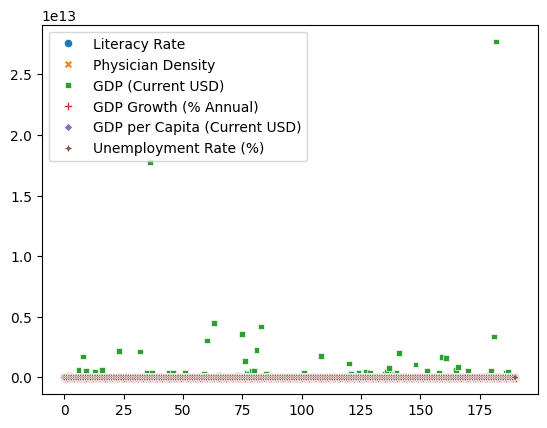

In [177]:
sns.scatterplot(data = df)

In [178]:
X = df[["Literacy Rate", "Physician Density","Unemployment Rate (%)","GDP (Current USD)","GDP Growth (% Annual)"]].values
y = df[["GDP per Capita (Current USD)"]].values

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
y_train

array([[1.70678136e+04],
       [6.02343620e+02],
       [3.01333044e+04],
       [7.90658503e+03],
       [5.56512645e+03],
       [6.17281247e+03],
       [4.85098416e+03],
       [1.01026893e+03],
       [3.45745692e+03],
       [3.82796496e+03],
       [2.27978112e+04],
       [1.73686091e+03],
       [2.44913772e+04],
       [2.92188606e+04],
       [2.18654563e+04],
       [1.59663696e+03],
       [3.61060880e+03],
       [1.37762604e+03],
       [4.16828521e+03],
       [8.82689810e+02],
       [1.59031238e+03],
       [1.29827612e+04],
       [7.18202526e+03],
       [4.03957692e+04],
       [6.83972504e+03],
       [8.79250944e+04],
       [5.36402795e+03],
       [6.84538769e+04],
       [2.77860058e+04],
       [4.08416940e+03],
       [6.42937918e+02],
       [1.26140617e+04],
       [2.56580515e+05],
       [7.82023240e+03],
       [1.33072781e+03],
       [1.38170459e+04],
       [2.61287066e+03],
       [3.58965051e+04],
       [3.77144629e+03],
       [8.23265226e+03],


In [181]:
y_test

array([[   757.858336  ],
       [  2480.792087  ],
       [  6022.542542  ],
       [ 11246.34512   ],
       [ 44690.93454   ],
       [  7829.053137  ],
       [ 56033.57379   ],
       [ 54700.90932   ],
       [ 21549.83687   ],
       [   583.        ],
       [ 80195.87465   ],
       [  2041.636491  ],
       [  1394.373302  ],
       [ 33509.0128    ],
       [  5838.631081  ],
       [ 49463.85546   ],
       [ 32610.11092   ],
       [ 23400.72788   ],
       [ 55516.83648   ],
       [  7638.24597218],
       [  2429.748535  ],
       [ 32962.90651   ],
       [  5762.821746  ],
       [128678.1899    ],
       [   951.2427483 ],
       [ 12221.47755   ],
       [168647.56848462],
       [  3115.11967846],
       [   627.5021817 ],
       [  4876.314327  ],
       [  1224.489624  ],
       [  1541.040509  ],
       [ 21787.10173   ],
       [ 18686.4051    ],
       [  2066.949798  ],
       [  5494.074094  ],
       [ 13790.02434   ],
       [ 82769.41221   ],
       [ 131

In [182]:
X_train.shape

(152, 5)

In [183]:
X_test.shape

(39, 5)

In [184]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [185]:
y_test

array([[-0.6982251 ],
       [-0.65077338],
       [-0.55322922],
       [-0.40935927],
       [ 0.51174589],
       [-0.50347569],
       [ 0.82413613],
       [ 0.78743291],
       [-0.12558842],
       [-0.70304091],
       [ 1.48959563],
       [-0.66286827],
       [-0.68069469],
       [ 0.203782  ],
       [-0.55829437],
       [ 0.643198  ],
       [ 0.17902514],
       [-0.07461261],
       [ 0.80990455],
       [-0.50873076],
       [-0.65217919],
       [ 0.18874156],
       [-0.56038225],
       [ 2.82485826],
       [-0.69289906],
       [-0.38250292],
       [ 3.92566414],
       [-0.63330322],
       [-0.70181527],
       [-0.58479775],
       [-0.6853735 ],
       [-0.6766553 ],
       [-0.11905386],
       [-0.20445086],
       [-0.66217111],
       [-0.56778389],
       [-0.33930321],
       [ 1.56047402],
       [-0.35699414]])

In [186]:
type(y_test)

numpy.ndarray

In [187]:
X_train = torch.tensor(X_train, dtype = torch.float32) # convert numpy array to tensor array
y_train = torch.tensor(y_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

In [188]:
type(y_test)

torch.Tensor

In [189]:
class DeepRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(DeepRegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x): # if not use sequential define l2 = RELU_1(L1) , L3 = RELU_1(L2)
        return self.network(x)

In [190]:
X_train.shape

torch.Size([152, 5])

In [191]:
model = DeepRegressionModel(input_dim=X_train.shape[1])
print("\nModel architecture:")
print(model)


Model architecture:
DeepRegressionModel(
  (network): Sequential(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [192]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [193]:
epochs = 500 #hypothesis
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}")

Epoch [50/500] - Loss: 0.1825
Epoch [100/500] - Loss: 0.0833
Epoch [150/500] - Loss: 0.0442
Epoch [200/500] - Loss: 0.0272
Epoch [250/500] - Loss: 0.0164
Epoch [300/500] - Loss: 0.0100
Epoch [350/500] - Loss: 0.0079
Epoch [400/500] - Loss: 0.0092
Epoch [450/500] - Loss: 0.0044
Epoch [500/500] - Loss: 0.0041


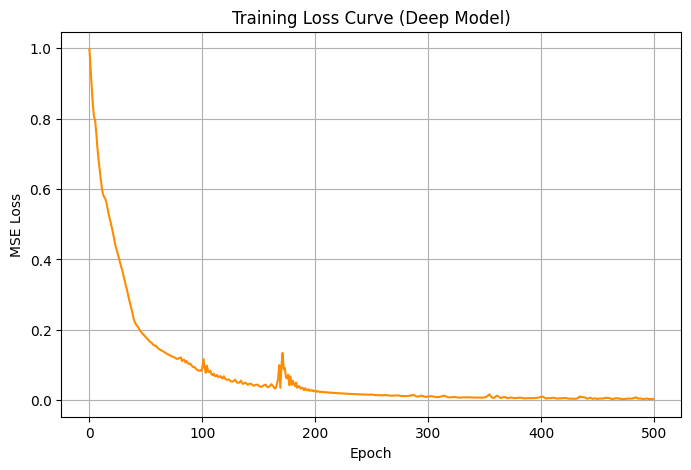

In [194]:
plt.figure(figsize=(8,5))
plt.plot(losses, color='darkorange')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (Deep Model)")
plt.grid(True)
plt.show()

In [195]:
y_pred

tensor([[ 0.0325],
        [-0.5521],
        [ 0.5793],
        [-0.3168],
        [-0.3892],
        [-0.3268],
        [-0.3688],
        [-0.5238],
        [-0.4392],
        [-0.4334],
        [ 0.2091],
        [-0.5144],
        [ 0.0377],
        [ 0.3987],
        [ 0.1609],
        [-0.5037],
        [-0.4035],
        [-0.5302],
        [-0.3885],
        [-0.5627],
        [-0.5075],
        [-0.0999],
        [-0.3147],
        [ 0.7664],
        [-0.3378],
        [ 2.4554],
        [-0.3866],
        [ 1.7524],
        [ 0.3712],
        [-0.3988],
        [-0.5581],
        [-0.0670],
        [ 8.3635],
        [-0.2631],
        [-0.5059],
        [-0.0759],
        [-0.4602],
        [ 0.6524],
        [-0.4578],
        [-0.3799],
        [ 0.0382],
        [-0.5525],
        [-0.2123],
        [-0.4953],
        [ 1.2943],
        [-0.2198],
        [ 0.1625],
        [ 0.0353],
        [-0.4545],
        [ 0.0836],
        [-0.3073],
        [-0.5078],
        [ 0.

In [196]:
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    print(f"\nTest MSE: {test_loss.item():.4f}")


Test MSE: 4.5481


In [197]:
for i in range(5):
    print(f"Predicted: {y_pred_test[i].item():.2f} | Actual: {y_test[i].item():.2f}")

Predicted: -0.63 | Actual: -0.70
Predicted: -0.32 | Actual: -0.65
Predicted: -0.63 | Actual: -0.55
Predicted: -0.20 | Actual: -0.41
Predicted: 1.00 | Actual: 0.51


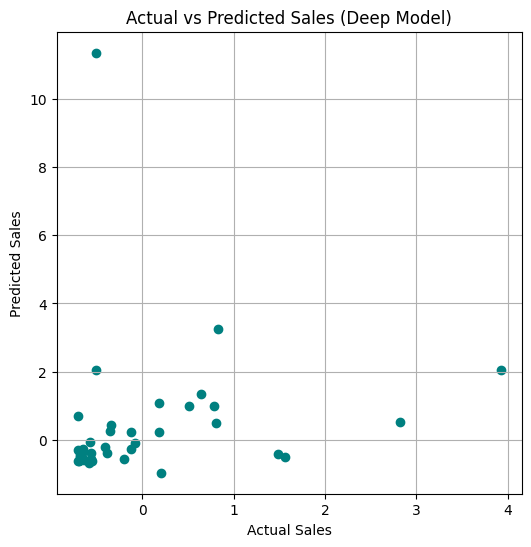

In [198]:
plt.figure(figsize=(6,6))
plt.scatter(y_test.numpy(), y_pred_test.numpy(), color='teal')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Deep Model)")
plt.grid(True)
plt.show()